In [13]:
from IPython.display import HTML
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# OPEN AND READ FILE xyzData.txt
with open("xyzData.txt") as file:
    xyz = np.asarray([[float(num) for num in line.split('\t')] for line in file])
dfXyz = pd.DataFrame(data=xyz[0:,0:],columns=['x','y','z']) 

In [39]:
def animate(i):
    
    while True:        
        try:
            with open("magData.txt") as file:
                mag = np.asarray([[float(num) for num in line.split('\t')] for line in file])
            dfMag = pd.DataFrame(data=mag[0:,0:],columns=['x','y','z']) # CREATE DATAFRAME FOR ARRAY

            # CREATING DYNAMIC DF FOR HDATA
            with open("Hvector.txt") as file:
                H = np.asarray([[float(num) for num in line.split('\t')] for line in file])
            dfH = pd.DataFrame(data=H[0:,0:],columns=['x','y','z']) # CREATE DATAFRAME FOR ARRAY
            
            ax.clear()    
            ax.scatter(dfXyz.x, dfXyz.y, dfXyz.z, s=80, alpha=0.5, color="k")
            ax.quiver(dfXyz.x, dfXyz.y, dfXyz.z,dfMag.x, dfMag.y, dfMag.z, length=0.55, alpha='0.85',color='#FC383E')
            ax.quiver(0.0, 0.0, 5.5,dfH.x, dfH.y, dfH.z, length=1.5, color='indigo', alpha=1)
            ax.text(0,-2.2,6.5, '$H_{ext}$', fontsize=10)
            ax.set_title('3D - Representation', size="xx-large", family="serif", weight= "semibold")
            ax.set_xlabel('X',fontsize= 20, color="#000000", family="serif", labelpad=20)
            ax.set_ylabel('Y',fontsize= 20, color="#000000", family="serif", labelpad=20)
            ax.set_zlabel('Z',fontsize= 20, color="#000000", family="serif", labelpad=20)
            fig.canvas.draw()
            break
        except (ValueError,IndexError):
            print("Error!!!!")

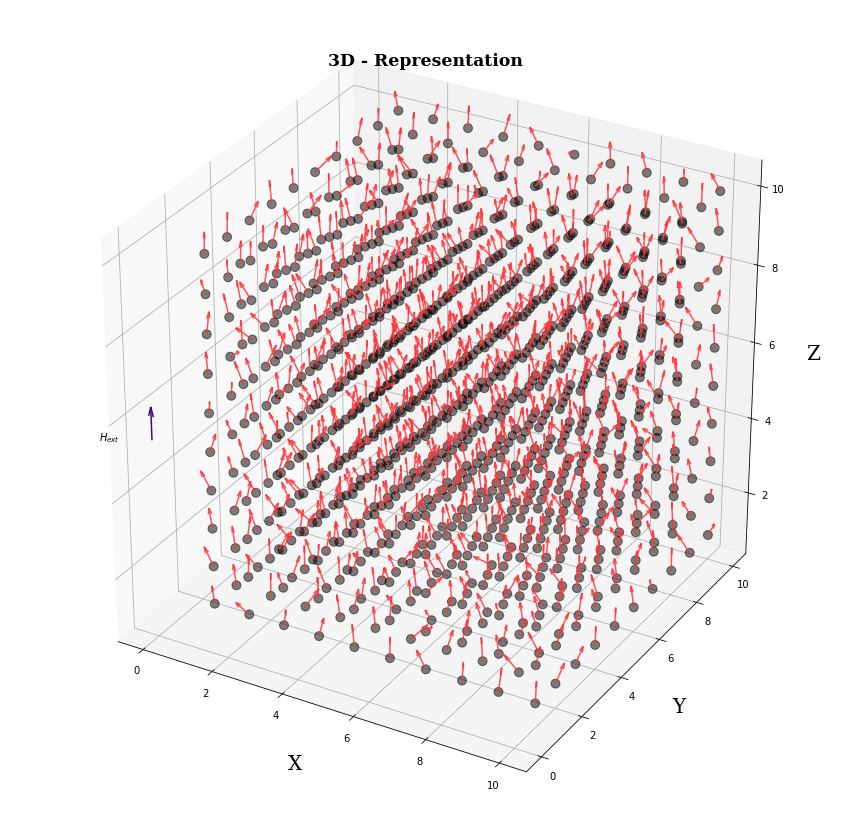

In [40]:
#%matplotlib qt 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ani = animation.FuncAnimation(fig,animate,interval=100)
plt.show()